# Problem Statement

- We need to predict the chance of admission based on various scores

## Refer SKlearn official Documnetation if yor are sure about syntax or parameter

https://scikit-learn.org/stable/index.html

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/s4sauravv/Datasets/main/Admission_Prediction.csv")

In [35]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [36]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [37]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")
df.head()

df = df.drop(columns="serial_no.")

# Filling Null Values (Using KNN Imputer)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gre_score          485 non-null    float64
 1   toefl_score        490 non-null    float64
 2   university_rating  485 non-null    float64
 3   sop                500 non-null    float64
 4   lor                500 non-null    float64
 5   cgpa               500 non-null    float64
 6   research           500 non-null    int64  
 7   chance_of_admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


In [39]:
imputation = ['gre_score','toefl_score','university_rating']
df_num = df.loc[: , imputation]

In [40]:
imp = KNNImputer(missing_values=np.nan,
    n_neighbors=3,
    weights='uniform',
    metric='nan_euclidean',
    copy=True,
    add_indicator=False,
    keep_empty_features=False,)

imp.fit(df_num)

KNNImputer(n_neighbors=3)

In [41]:
df_num = imp.transform(df_num)
df_num = pd.DataFrame(df_num, columns = imputation)

df["gre_score"] = df_num["gre_score"]
df["toefl_score"] = df_num["toefl_score"]
df["university_rating"] = df_num["university_rating"]

In [42]:
df.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,311.333333,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


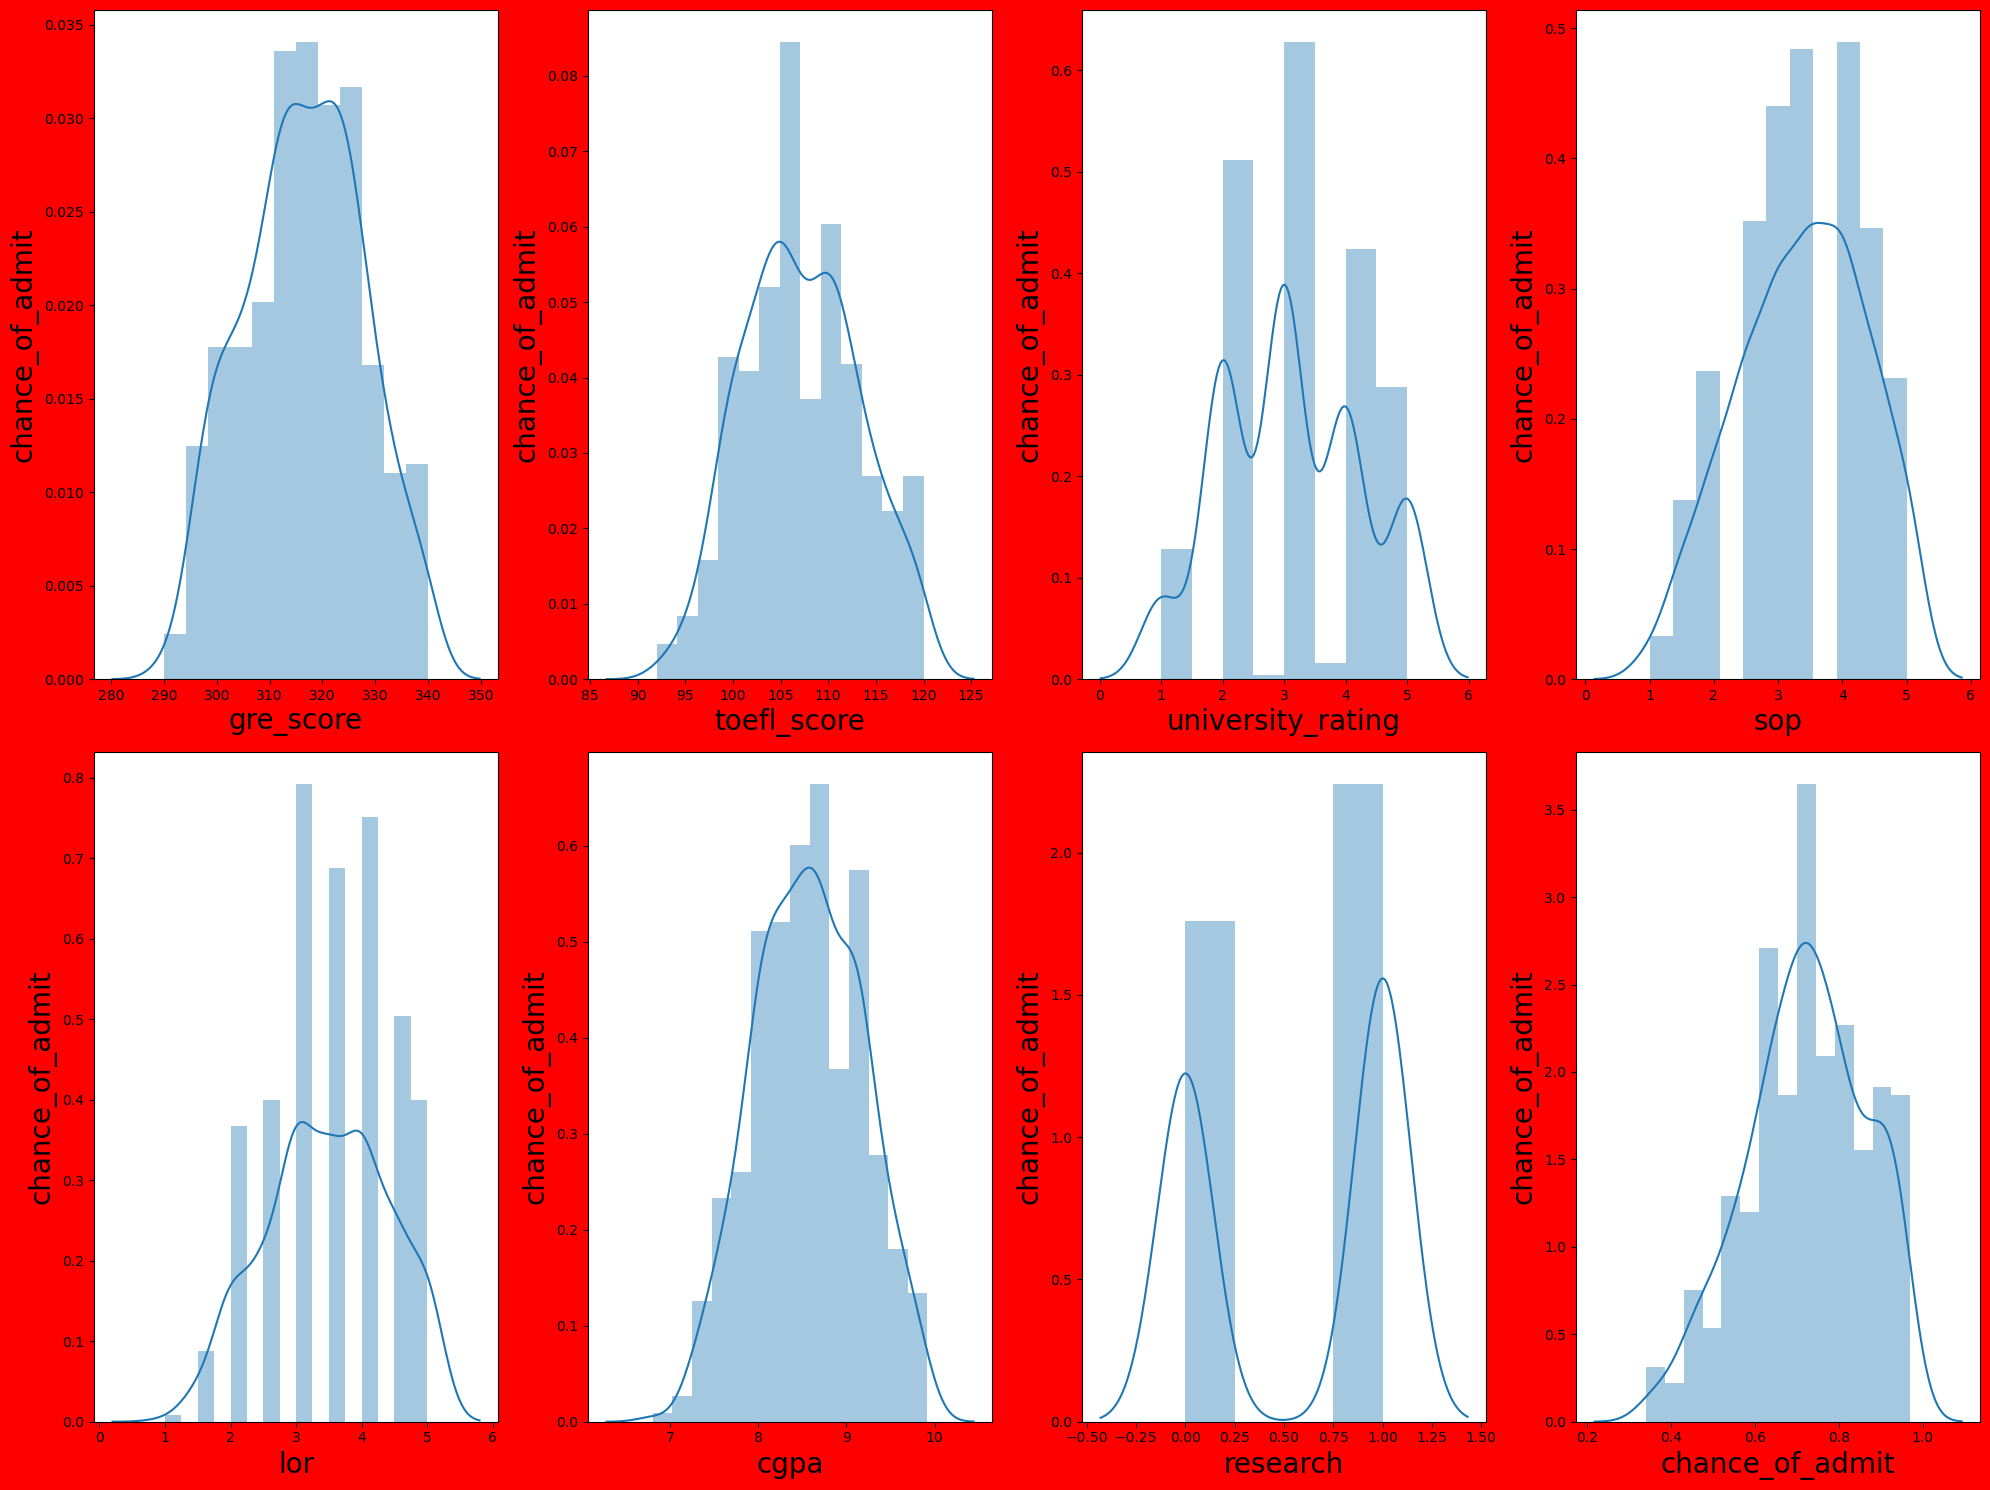

In [43]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in df:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('chance_of_admit', fontsize=20)
        plotnumber +=1
plt.tight_layout()

In [44]:
#Divide dataset into dependent and independent variable

column_list = df.drop(columns=["chance_of_admit"]) #Dependent Varible
target_feature = df['chance_of_admit'] #Independent Variable

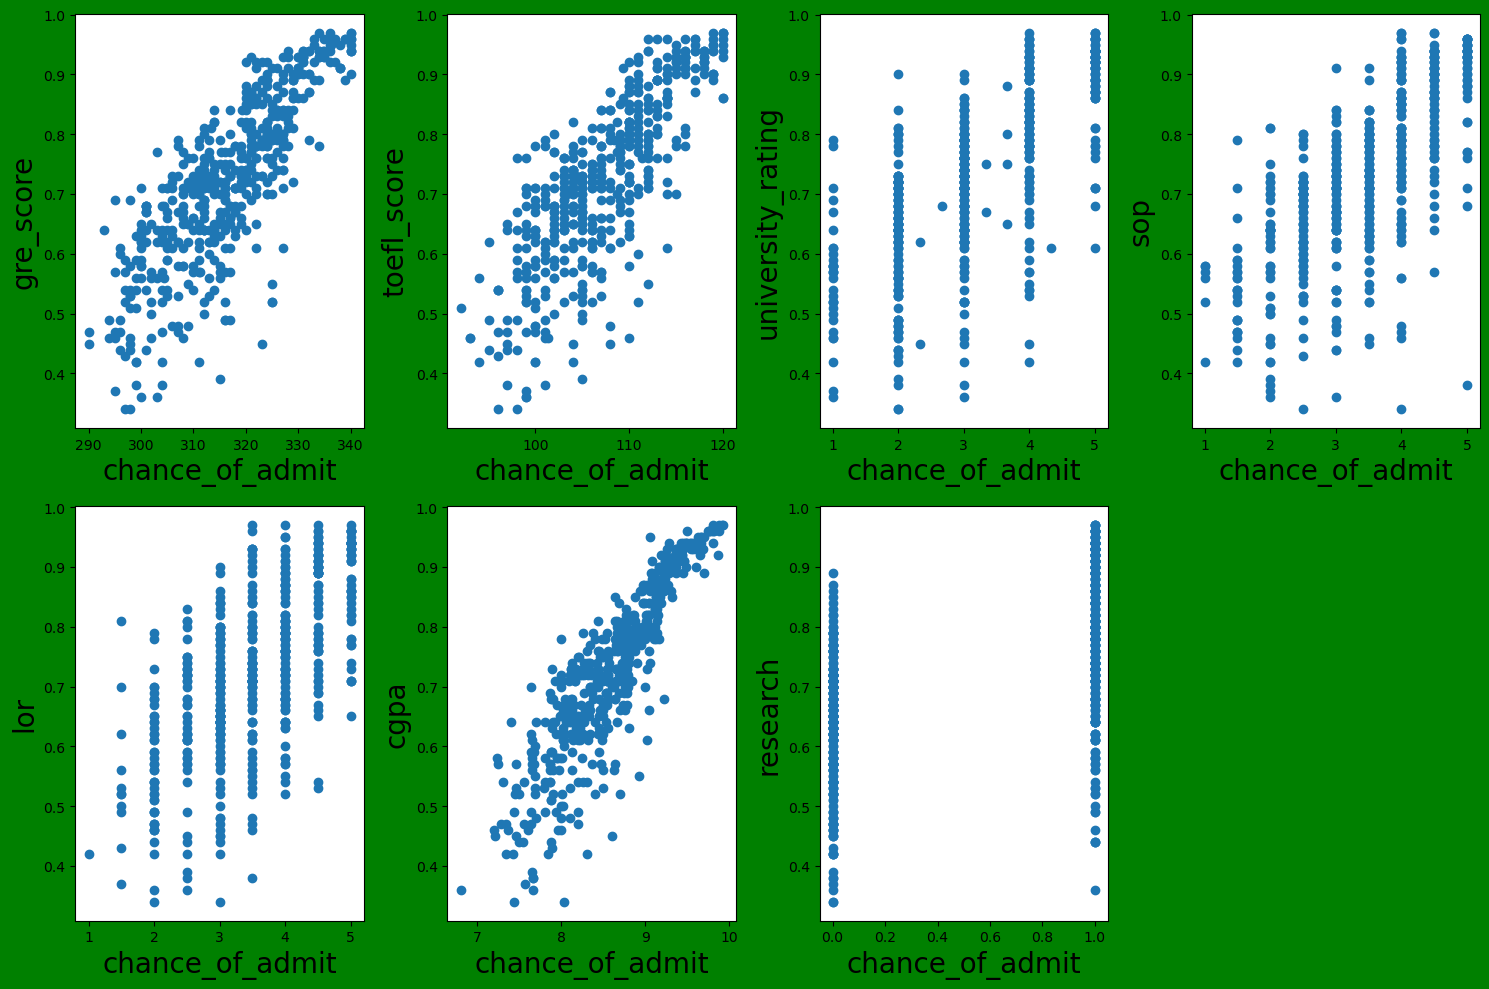

In [45]:
plot_no = 1
plt.figure(figsize=(15,10),facecolor='green')
for column in column_list:
        ax=plt.subplot(2,4,plot_no)
        plt.scatter(column_list[column], target_feature)
        plt.xlabel('chance_of_admit', fontsize=20)
        plt.ylabel(column, fontsize=20)
        plot_no += 1
plt.tight_layout()

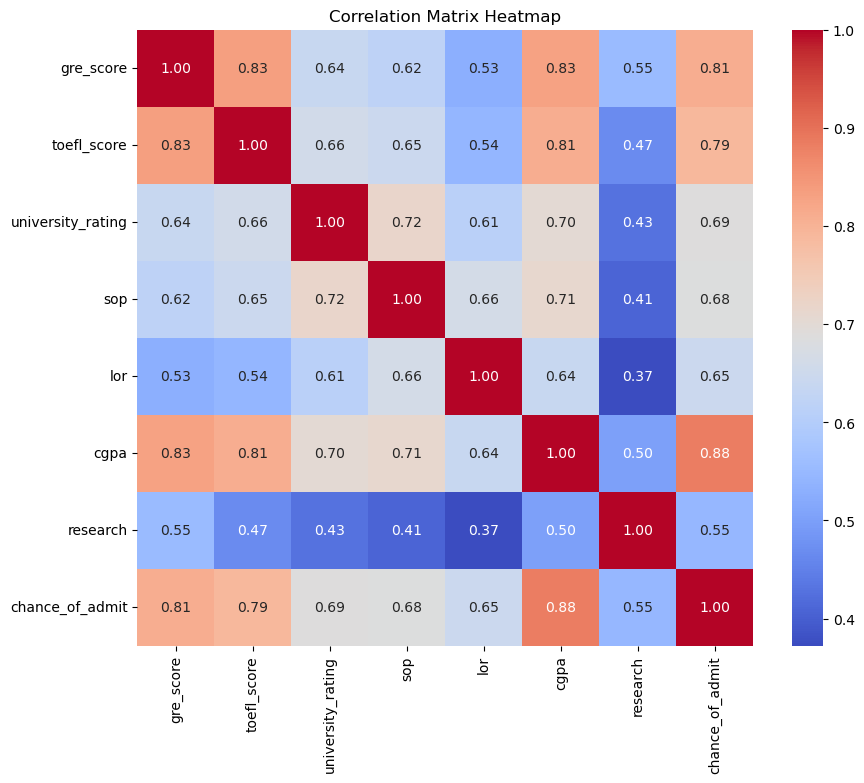

In [46]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### We can infer from Scatter Plot and Correlation Heat Matrix that GRE Score, TOEFL Score and CGPA have best relation with target feature but other relation looks fair, hence linearly assumption is satisfied.

In [47]:
#Now we convert the data into StandardScalar to remove the biasness and create uniformity. It will just use the formula
#z = (x-mean)/std

scaler = StandardScaler()
x_scaled = scaler.fit_transform(column_list)

In [48]:
x_scaled

array([[ 1.82593019,  1.78359853,  0.77181978, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66821149, -0.03146103,  0.77181978, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.45982212, -0.52647728, -0.10925303, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.2025432 ,  2.11360936,  1.65289259, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.40045193, -0.69148269,  0.77181978, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93537734,  0.95857146,  0.77181978, ...,  1.09894429,
         0.76721964, -1.12815215]])

# Train Test Split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled, target_feature, test_size=0.30, random_state=42)

# Model Instantiating and Training

In [50]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
df.tail(5)

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [52]:
#For prdicting first we have to covert into standard scalar So, that our model can understand.
print("Chance of Admission is : ", lr.predict(scaler.transform([[330.0,120.0,5.0,4.5,5.0,9.56,1]])))

Chance of Admission is :  [0.95172667]


# Saving Model for Future Use

In [53]:
pickle.dump(lr, open("Projects",'wb')) #Saves in bit wise

In [54]:
#Load Model
lr_model = pickle.load(open("Projects",'rb'))

In [55]:
lr_model

LinearRegression()

In [56]:
#Checking the saved model
predict = lr_model.predict(scaler.transform([[330.0,120.0,5.0,4.5,5.0,9.56,1]]))
print(predict)

[0.95172667]


# Check Model Accuracy (Adjusted R2)

In [57]:
lr.score(X_train,y_train) #To check how good my model understood the training data.

0.8171094089056532

In [58]:
lr.score(X_test,y_test) #To check how good my model understood the testing data.

0.8246017050274139

# Visualization (Actual Vs Predicted)

In [59]:
y_pred =(lr.predict(X_test))

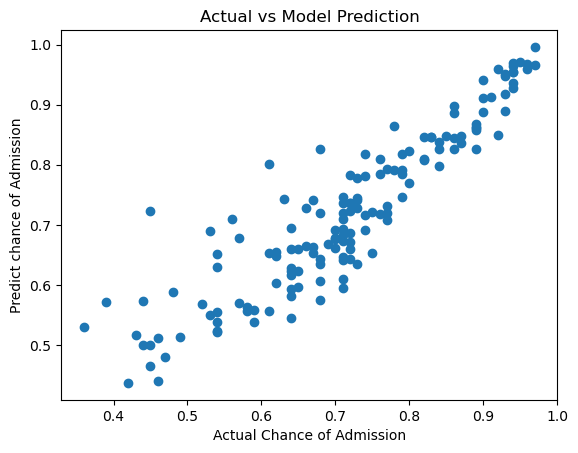

In [60]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predict chance of Admission')
plt.title('Actual vs Model Prediction')
plt.show()

# Model Evaluation (MAE, MSE, RMSE)

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [63]:
mean_absolute_error(y_test,y_pred) #MAE

0.042872213769427604

In [64]:
mean_squared_error(y_test,y_pred) #MSE

0.0036556621774903263

In [65]:
np.sqrt(mean_squared_error(y_test,y_pred)) #RMSE

0.06046207222292605

# Suppose I assume Model is Overfitted

## LassoCV

In [66]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [67]:
lasscv=LassoCV(alphas = None , max_iter =100)
lasscv.fit(X_train,y_train)

LassoCV(max_iter=100)

In [68]:
alpha=lasscv.alpha_
print(alpha)

0.0010473471599514834


In [70]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.0010473471599514834)

In [71]:
lasso_reg.score(X_test,y_test)

0.8245798067655827

### So, what its indicate now ,why we are trying Lasso regression beacuse we thought that linear regression is overfitted here also getting a same result which means that we either use a linear regression or lasso both are giving same .it means our model has not over fitted . so that conclusion is we can make here . our model is not overfitted.

## Ridge 

In [72]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [73]:
ridgecv.alpha_

0.09099999999999998

In [74]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.09099999999999998)

In [75]:
ridge_model.score(X_test,y_test)

0.8246043470962311

## We got around same R2 using ridge regression as well. So, its safe to say there is no overfitting.